In [122]:
from matplotlib import pyplot as plt 
import numpy as np
from math import floor, ceil

In [123]:
def yAt(x, a, b, c):
  return (-a/b)*x + (-c/b)

def distanceFrom(x, y, a, b, c):
  return abs((a*x + b*y + c) / np.sqrt(a**2 + b**2))

In [124]:
b = 0
while(b == 0):
  b = np.random.normal(loc = 0)

a = np.random.normal(loc = 0)
c = np.random.normal(loc = 0)

In [125]:
counter = 0
D1 = []
D2 = []
gamma = 0.125 
while counter  < 1000:
  x_i = np.random.randn() 
  y_i = np.random.randn() 
  if distanceFrom(x_i, y_i, a, b, c) > gamma:
    counter += 1
    if y_i > yAt(x_i, a, b, c):
      D1.append([x_i, y_i])
    else:
      D2.append([x_i, y_i])

D1 = np.array(D1)
D2 = np.array(D2)
print(D1.shape)
print(D2.shape)

(490, 2)
(510, 2)


(-3.0, 3.0)

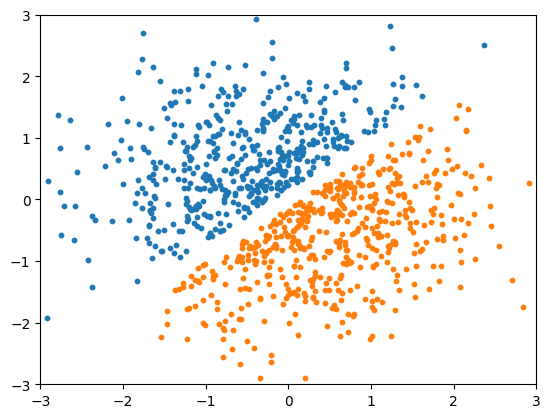

In [126]:
plt.scatter(D1[:, 0], D1[:, 1], s = 10)
plt.scatter(D2[:, 0], D2[:, 1], s = 10)
plt.xlim([-3,3 ])
plt.ylim([-3,3 ])

In [127]:
X = np.ones((1000, 3))
D = np.concatenate((D1, D2), axis = 0)
X[:,:2] = D
Y = np.empty((np.size(X, 0), 1))
Y[:np.size(D1, 0), 0] = 1
Y[np.size(D1, 0):, 0] = -1

In [128]:
W = np.zeros(np.size(X, 1))
print(W.shape)

(3,)


In [129]:
def train_perceptron(x, y, w):
  nb_epochs = 0
  while(True):
    nb_changes = 0
    for i in range(np.size(x, 0)):
      if x[i].T @ w * y[i] <= 0:
        w = w + y[i] * x[i]
        nb_changes += 1
    if nb_changes == 0:
      return (w, nb_epochs)


In [130]:
W, epochs = train_perceptron(X, Y, W)
print(W)
print(epochs)

[-3.02981585  3.8183926   0.        ]
0


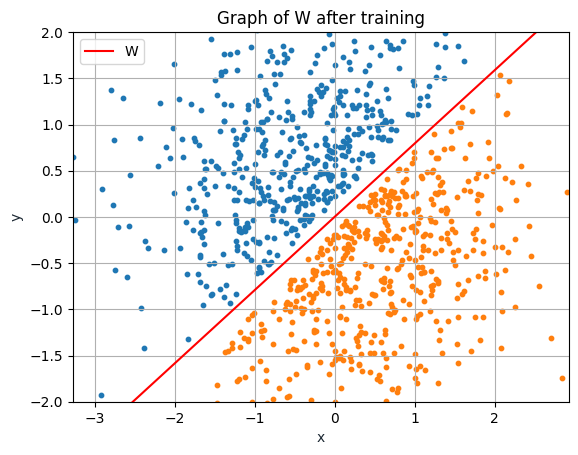

In [131]:
x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1], s = 10)
plt.scatter(D2[:,0], D2[:,1], s = 10)
plt.xlim(min(D1[:, 0].min(), D2[:,0].min()), max(D1[:,1].max(), D1[:,1].max()))
plt.ylim(-2, 2)
plt.grid()
plt.show()